In [1]:
import numpy as np
import pandas as pd 
import keras
import os
import re
from sklearn.cluster import KMeans
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing, model_selection
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn import datasets
from tensorflow.keras.datasets import mnist
from Levenshtein import distance

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

Using TensorFlow backend.


In [2]:
def get_goodXy (X,y):
    ynew = model.predict_classes(X)
    X_good =[]
    y_good=[]
    for i in range(len(X)):
        if (ynew[i]==0 and y[i]==1) or (ynew[i]==1 and y[i]==0):
            print ("error prediction for X=%s, Predicted=%s, Real=%s"% (X[i], ynew[i], y[i]))
        else :
            X_good.append(X[i])
            y_good.append(y[i])
    return X_good,y_good        

def get_result_layers(model,X):
    result_layers=[]
    for i in range (len(model.layers)-1):
        hidden_layers= keras.backend.function(
                [model.layers[0].input],   
                [model.layers[i].output,] 
                )    
        result_layers.append(hidden_layers([X_good])[0])  
    return result_layers

def save_result_layers(filename,X,y,result_layers):
    f = open(filename, "w")
    for nb_X in range (len(X)):
        #my_string=""
        my_string=str(y[nb_X])+','
        for nb_layers in range (len(model.layers)-1):
            my_string+="<b>,"
            for j in range (len(result_layers[nb_layers][nb_X])):
                my_string+=str(result_layers[nb_layers][nb_X][j])+','
            my_string+="</b>,"    
        my_string=my_string [0:-1]
        my_string+='\n'
        f.write(my_string)    
    f.close()

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train_sample=X_train[0:150]
y_train_sample=y_train[0:150]

X_train=X_train_sample
y_train=y_train_sample
X_train = X_train.reshape(150, 784)
X_train = X_train.astype('float32')

X_train /= 255



X_01=[]
y_01=[]
nb_X=0
for i in range(X_train.shape[0]):
    if (y_train[i]==0 or y_train[i]==1):
        
        nb_X+=1
        X_01.append(X_train[i])
        y_01.append(y_train[i])

       
train_X=np.asarray(X_01)

train_y=y_01

encoder = LabelEncoder()
train_y=encoder.fit_transform(train_y)



input_dim = 784

model = Sequential()
model.add(Dense(150, input_dim = input_dim , activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'] )

model.fit(train_X, train_y, epochs = 40, batch_size = 100)

X_good,y_good=get_goodXy (train_X, train_y)

# Récupération des valeurs de tous les layers sauf le dernier
result_layers=get_result_layers(model,X_good)

# Sauvegarde du fichier
# structure :
# 0/1 = valeur de la classe
# chaque valeur de layer est entourée par une étoile *
save_result_layers("mnist_512_tmp",X_good,y_good,result_layers)
# tri du fichier
os.system ('sort mnist_512_tmp > mnist_512_.csv')
# effacer le fichier intermédiaire
#os.system ('rm mnist_512_tmp')






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/40





40/40 [==============================] - 0s 11ms/step - loss: 0.7594 - acc: 0.3000
Epoch 2/40
40/40 [==============================] - 0s 268us/step - loss: 0.5648 - acc: 0.5750
Epoch 3/40
40/40 [==============================] - 0s 374us/step - loss: 0.4344 - acc: 0.8250
Epoch 4/40
40/40 [==============================] - 0s 348us/step - loss: 0.3436 - acc: 0.9750
Epoch 5/40
40/40 [==============================] - 0s 598us/step - loss: 0.2629 - acc: 1.0000
Epoch 6/40
40/40 [==============================] - 0s 374us/step - loss: 0.1999 - acc: 1.0000
Epoch 7/40
40/40 [==============================] - 0s 249us/step - loss: 0.1531 - acc: 1.0000
Epoch 8/40
40/40 [==============================] - 0s 224us/step - loss: 0.1170 - acc: 1.0000
Epoch 9/40
40/40 [==============================] - 0s 175us/step - loss: 0.0906 - acc: 1.0000
Epoch 10/40
40/40 [====================

0

In [4]:
def get_directory_layers_from_csv(filename):
    tokens=filename.split("_")
    df = pd.read_csv(filename, sep = ',', header = None) 
    
    # creation d'un répertoire pour sauver tous les fichiers
    repertoire=filename[0:-4]
    os.makedirs(repertoire, exist_ok=True)
    string = repertoire+'/'+tokens[0]+'_'
    f=[]
    filenames=[]
    for nb_tokens in range (1,len(tokens)-1):
        name_file=string+'l'+str(nb_tokens)+'_'+tokens[nb_tokens]+'.csv'
        f.append(open(name_file, "w"))
        filenames.append(name_file)
        
        
    # sauvegarde du dataframe dans une chaîne de caracteres
    ch = df.to_string(header=False,
                  index=False,
                  index_names=False).split('\n')
    vals = [','.join(ele.split()) for ele in ch]
    
    # sauvegarde dans des fichiers spécifiques par layer
    token_layer=[]
    token_exemples=[]
    for nb_exemples in range (len(vals)):
        deb=str(df[0][nb_exemples])+','
        # 1 ligne correspond à une chaine
        s=vals[nb_exemples]
        listoftokens=re.findall(r'<b>,(.+?),</b>', s)
        nb_layers=len(listoftokens)
        
        for nb_token in range (nb_layers):
            save_token=''
            save_token=deb+str(listoftokens[nb_token])+'\n'
            
            f[nb_token].write(save_token)

        
filename='mnist_512_tmp'
get_directory_layers_from_csv(filename)


def discretise_dataset(filename,bins):
    df = pd.read_csv(filename, sep = ',', header = None) 
    oneColumn = np.array(df[1])
    for i in range(2,df.shape[1]):
        oneColumn=np.append(oneColumn,np.array(df[i]))
    dfoneColumn=pd.DataFrame(oneColumn)
    nb_bins=bins
    dftemp=pd.DataFrame()
    dftemp[0]=pd.cut(dfoneColumn[0], bins=nb_bins, labels=np.arange(nb_bins), right=False)
    df_new=pd.DataFrame(df[0])
    nb_tuples=df.shape[0]
    j=0
    for i in range(1,df.shape[1]):
        df_new[i]=np.copy(dftemp[0][j:j+nb_tuples])
        j+=nb_tuples
    return df_new

len :  40
CLUSTER
MATRIX :  [[  0 198 201 ... 195 192 193]
 [198   0 135 ... 134 132 161]
 [201 135   0 ... 128 125 157]
 ...
 [195 134 128 ...   0 126 162]
 [192 132 125 ... 126   0 161]
 [193 161 157 ... 162 161   0]]


DB :  DBSCAN(algorithm='auto', eps=150, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=2, n_jobs=None, p=None)
Estimated number of clusters: 2
Estimated number of noise points: 15


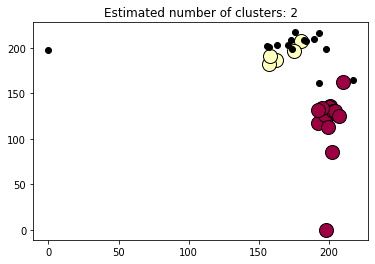

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:108: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


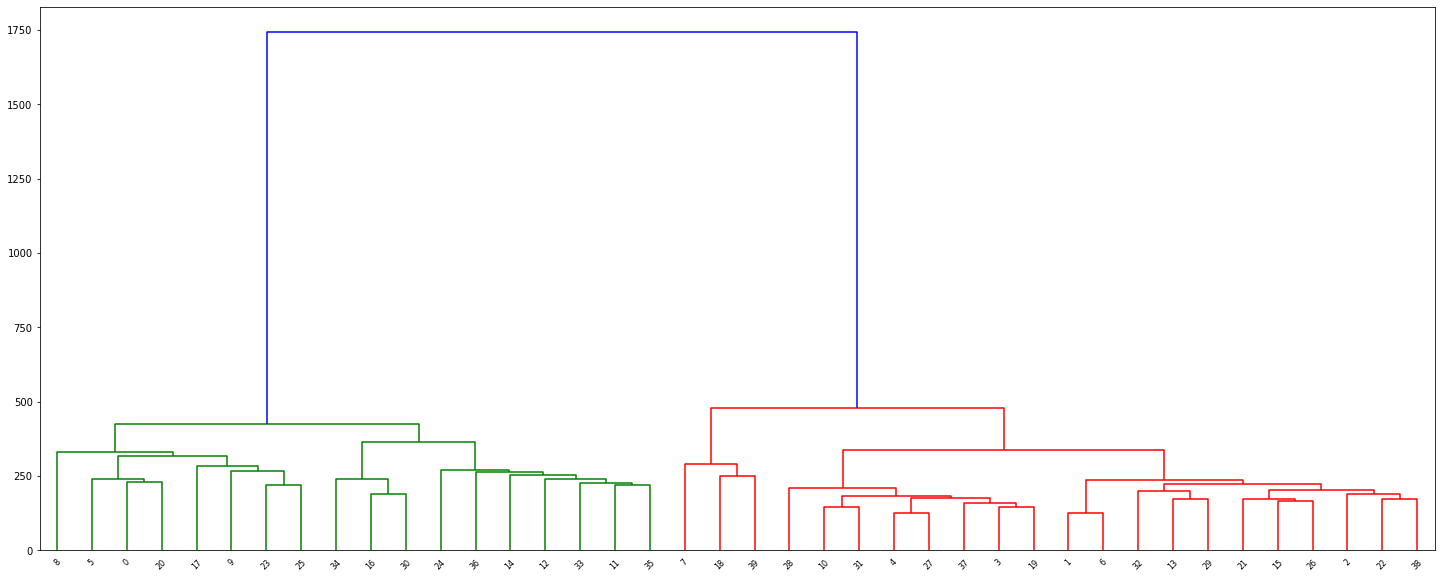

In [5]:
# exemple d'utilisation  
df=discretise_dataset('mnist_512/mnist_l1_512.csv',150)
#print (df.head())
#print (df.tail())

#exemple d'utilisation de la mesure de levenshtein
#print (distance('3,10,0,4,0,0,9,0', '4,8,0,2,0,0,8,0'))

#Creation d'une matrice de distance
#df_mat=pd.DataFrame(X)

df.to_csv("mnist_512/mnist_l1_512_disc.csv")

string="mnist_512/mnist_l1_512_disc.csv"

#df_mat.to_csv(string, sep=',', encoding='utf-8',index=False, header=False)
df_mat=pd.read_csv(string, sep = ',',header = None)

#recuperation de la matrice sous la forme de chaine
ch = df_mat.to_string(header=False,index=False,index_names=False).split('\n')

vals = []

for v in df_mat.values[1:]:
    string = ""
    for s in v[1:]:
        string = string + str(s) + ","
    new_string = string[:-1]
    vals.append(new_string)

#print(vals)

List1 = vals
List2 = vals

Matrix = np.zeros((len(List1),len(List2)),dtype=np.int)

for i in range(0,len(List1)):
    for j in range(0,len(List2)):
        Matrix[i,j] = distance(List1[i],List2[j])

#print (Matrix)
print("len : ", len(Matrix))
"""import sklearn.cluster

words = vals
words = np.asarray(words) #So that indexing with a list will work

lev_similarity = -1*np.array([[distance(w1,w2)for w1 in words] for w2 in words])

affprop = sklearn.cluster.AffinityPropagation(affinity="precomputed", damping=0.5)
affprop.fit(lev_similarity)

#Affichage
for cluster_id in np.unique(affprop.labels_):
    exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = ", ".join(cluster)
    print(" - *%s:* %s" % (exemplar, cluster_str))"""

print("CLUSTER")


# Generate sample data


#X = StandardScaler().fit_transform(Matrix)
print("MATRIX : ",Matrix)
db = DBSCAN(eps=150, min_samples=2, metric="precomputed").fit(Matrix)

print("\n\nDB : ",db)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = Matrix[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = Matrix[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


Z = linkage(Matrix, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)
plt.show()